In [30]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sample data
data = np.array([100, 300, 400, 500, 1000])

# 1. Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# 2. Apply Z-score normalization (manual calculation)
z_score_scaled = (data - mean) / std_dev
print(f"Z-score Scaled Data (Manual Calculation): {z_score_scaled} ")


# 3. Apply StandardScaler (from scikit-learn)
# Reshape the data to be 2D, as StandardScaler expects 2D input
data_reshaped = data.reshape(-1, 1)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data using StandardScaler
data_scaled = scaler.fit_transform(data_reshaped)

print(f"Standard Scaled Data (Using StandardScaler): {data_scaled.ravel()}")


Mean: 460.0
Standard Deviation: 300.66592756745814
Z-score Scaled Data (Manual Calculation): [-1.19734219 -0.53215208 -0.19955703  0.13303802  1.79601328] 
,
Standard Scaled Data (Using StandardScaler): [-1.19734219 -0.53215208 -0.19955703  0.13303802  1.79601328]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore',category = FutureWarning)

In [61]:
df = pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

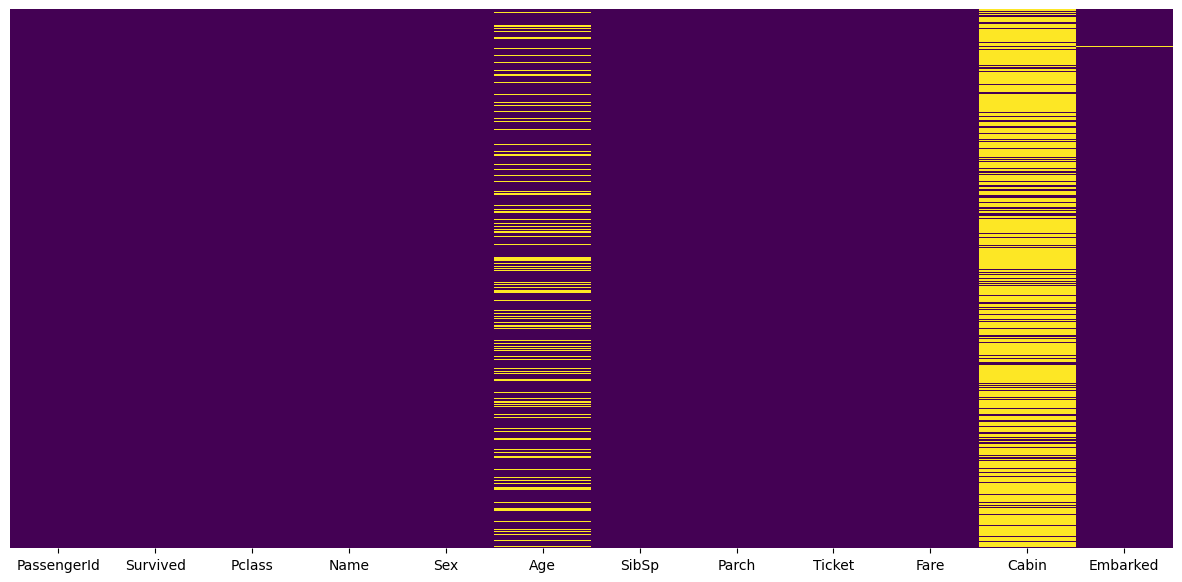

In [47]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [10]:
df.shape

(891, 15)

In [62]:
df.drop(['Name','Ticket','Cabin','PassengerId'],axis = 1,inplace = True)

In [32]:
df.count()

,0
Survived,891
Pclass,891
Sex,891
Age,714
SibSp,891
Parch,891
Fare,891
Embarked,889


In [ ]:
# Apply interpolation
df['Age'] = df['Age'].interpolate(method='linear')

In [63]:
df['Age'] = df['Age'].interpolate(method = 'linear')

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

#apply function
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis = 1)

In [64]:
df.count()

,0
Survived,891
Pclass,891
Sex,891
Age,891
SibSp,891
Parch,891
Fare,891
Embarked,889


In [65]:
df.dropna(inplace = True)

In [66]:
df.count()

,0
Survived,889
Pclass,889
Sex,889
Age,889
SibSp,889
Parch,889
Fare,889
Embarked,889


In [67]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,44.5,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [70]:
obj = ['Sex','Embarked']

for col in obj:
    df[col] = df[col].astype('category')

df.select_dtypes(include = 'category')
# df.select_dtypes(include = 'category').columns

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [72]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embarked = pd.get_dummies(df['Embarked'],drop_first = True)

In [73]:
df = pd.concat([df,sex,embarked],axis = 1)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    category
 3   Age       889 non-null    float64 
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    category
 8   male      889 non-null    bool    
 9   Q         889 non-null    bool    
 10  S         889 non-null    bool    
dtypes: bool(3), category(2), float64(2), int64(4)
memory usage: 53.2 KB


In [ ]:
# Apply one-hot encoding to the 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

<Axes: xlabel='Age', ylabel='Fare'>

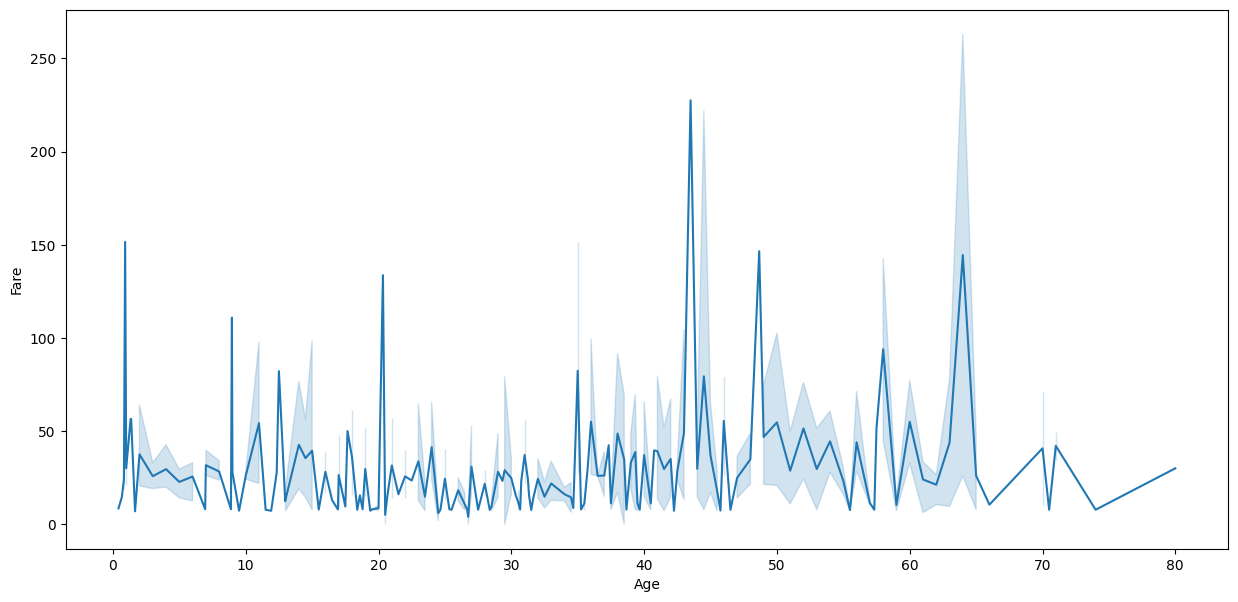

In [57]:
sns.lineplot(data = df, x = 'Age', y = 'Fare')

In [77]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [76]:
df.drop(['Sex','Embarked'],axis = 1,inplace = True)

In [79]:
x = df.drop('Survived',axis = 1)

y = df['Survived']

In [80]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 101)

###why we are using logistic regression instead of simple linear regression,
###▶because linear regression is used for linear(continous) prediction like price and amounts ✈ but logistic regression is used for just true|false ,yes|no,0|1
###in this case we're predicting whether a person is survived or not simple.

In [89]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression().fit(x_train,y_train)

In [90]:
lg_pred = lg.predict(x_test)

In [113]:
from sklearn.metrics import accuracy_score

print('===================================')
lg_pred_accuracy = round(accuracy_score(y_test,lg_pred) * 100,2)
print(f'Logistic Regression Accuracy: {lg_pred_accuracy}%')


Logistic Regression Accuracy: 80.9%


# Decision Tree Classifier

In [114]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier().fit(x_train,y_train)

dtc_pred = dtc.predict(x_test)

dtc_pred_accuracy = round(accuracy_score(y_test,dtc_pred) * 100, 2)

print(f'Decision Tree Classifire Accuracy:{dtc_pred_accuracy}%')

Decision Tree Classifire Accuracy:76.4%


# Random Rorest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier().fit(x_train,y_train)

rfc_pred = rfc.predict(x_test)

rfc_pred_accuracy = round(accuracy_score(y_test,rfc_pred) * 100 , 2)

print(f'Random Forest Classifier Accuracy: {rfc_pred_accuracy}%')

Random Forest Classifier Accuracy: 80.9%


# Gradient Boosting Classifier

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbc = GradientBoostingClassifier().fit(x_train,y_train)

gbc_pred = gbc.predict(x_test)

gbc_pred_accuracy = round(accuracy_score(y_test,gbc_pred) * 100 , 2)

print(f'Gradient Boosting Classifier Accuracy : {gbc_pred_accuracy}%')

Gradient Boosting Classifier Accuracy : 83.71%


# Model Ranking

In [119]:
model_score = {
    'Logistic Regression':lg_pred_accuracy,
    'Decision Tree Classifier':dtc_pred_accuracy,
    'Random Forest Classifier':rfc_pred_accuracy,
    'Gradient Boosting Classifier':gbc_pred_accuracy
}

# sort the value based on their accuracy level (higher values are the best)

model_score_sorted = sorted(model_score.items(),key = lambda x:x[1], reverse = True)

print('Model Ranking (Greater values are better)')
print('========================================')
for rank,(model_name,score) in enumerate(model_score_sorted, start = 1):
    print(f'{rank}.{model_name} : {score}%')

Model Ranking (Greater values are better)
1.Gradient Boosting Classifier : 83.71%
2.Logistic Regression : 80.9%
3.Random Forest Classifier : 80.9%
4.Decision Tree Classifier : 76.4%
